## importing modules

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
df=pd.read_csv(r"C:\Users\raviv\Downloads\diabetes.csv")

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
X=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [36]:
print(X_train.shape)

(614, 8)


In [37]:
print(X_test.shape)

(154, 8)


In [38]:
dt=DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
dt.score(X_test,y_test)

0.6948051948051948

In [41]:
from sklearn import tree

In [42]:
fig=plt.figure(figsize=(100,100))
tree.plot_tree(dt,feature_names=df.columns,class_names=['0','1'],filled=True)

[Text(0.5328487605485233, 0.9736842105263158, 'Glucose <= 143.5\ngini = 0.457\nsamples = 614\nvalue = [397, 217]\nclass = 0'),
 Text(0.18806039029535865, 0.9210526315789473, 'BMI <= 26.35\ngini = 0.369\nsamples = 471\nvalue = [356, 115]\nclass = 0'),
 Text(0.03375527426160337, 0.868421052631579, 'Glucose <= 124.5\ngini = 0.065\nsamples = 119\nvalue = [115, 4]\nclass = 0'),
 Text(0.016877637130801686, 0.8157894736842105, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.02\nsamples = 98\nvalue = [97, 1]\nclass = 0'),
 Text(0.008438818565400843, 0.7631578947368421, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]\nclass = 0'),
 Text(0.02531645569620253, 0.7631578947368421, 'DiabetesPedigreeFunction <= 0.706\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(0.016877637130801686, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.03375527426160337, 0.7105263157894737, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = 0'),
 Text(0.05063291139240506, 0.8

## post prunning

In [11]:
path=dt.cost_complexity_pruning_path(X_train,y_train)

In [12]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [13]:
ccp_alphas


array([0.        , 0.00130293, 0.00141151, 0.00150338, 0.00152687,
       0.00152687, 0.00158404, 0.00160892, 0.00161205, 0.00162866,
       0.00175204, 0.00186133, 0.00188201, 0.00188201, 0.00211465,
       0.00217155, 0.00217155, 0.00217155, 0.00217155, 0.00232666,
       0.00236769, 0.00240219, 0.002443  , 0.002443  , 0.002443  ,
       0.00257723, 0.00260586, 0.00269448, 0.00274837, 0.00275075,
       0.00277076, 0.00277476, 0.002792  , 0.002792  , 0.00285016,
       0.0028954 , 0.00297775, 0.00315862, 0.00322031, 0.00324415,
       0.00361123, 0.00399023, 0.00402694, 0.00414569, 0.0041459 ,
       0.00434311, 0.00474281, 0.00482159, 0.00488684, 0.00495523,
       0.00498678, 0.0050945 , 0.00764567, 0.00777389, 0.00886468,
       0.01112003, 0.01673863, 0.01883845, 0.02299263, 0.07863719])

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=4)

In [157]:
dts=[]
for ccp_alpha in ccp_alphas:
    dt=DecisionTreeClassifier(random_state=101,ccp_alpha=ccp_alpha)
    dt.fit(X_train,y_train)
    dts.append(dt)

In [158]:
train_score=[dt.score(X_train,y_train) for dt in dts]
test_score=[dt.score(X_test,y_test) for dt in dts]

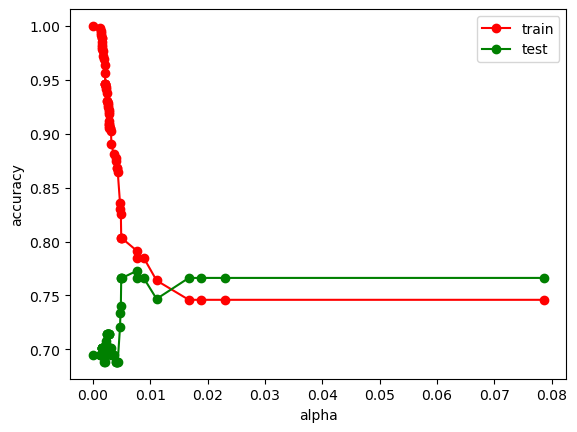

In [159]:
fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas,train_score,marker='o',color='red',label="train")
ax.plot(ccp_alphas,test_score,marker='o',color="green",label="test")
ax.legend()
plt.show()

In [160]:
dt=DecisionTreeClassifier(random_state=101,ccp_alpha=0.02)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7662337662337663

In [161]:
dt.get_params()

{'ccp_alpha': 0.02,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

[Text(0.6, 0.8333333333333334, 'Glucose <= 143.5\ngini = 0.457\nsamples = 614\nvalue = [397, 217]\nclass = 0'),
 Text(0.4, 0.5, 'BMI <= 26.35\ngini = 0.369\nsamples = 471\nvalue = [356, 115]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.065\nsamples = 119\nvalue = [115, 4]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.432\nsamples = 352\nvalue = [241, 111]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.409\nsamples = 143\nvalue = [41, 102]\nclass = 1')]

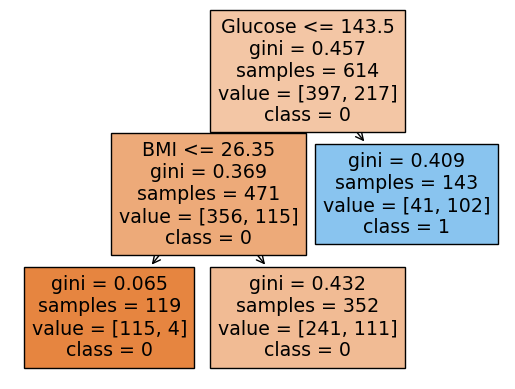

In [162]:
tree.plot_tree(dt,feature_names=df.columns,class_names=['0','1'],filled=True)

In [163]:
y_pred=dt.predict(X_test)

<AxesSubplot:>

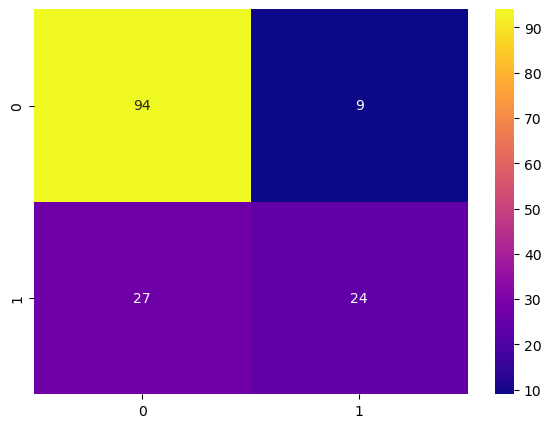

In [164]:
plt.figure(figsize=(7,5))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap= 'plasma')

## pre prunning 

In [165]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.6883116883116883

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:

grid_param={"criterion":["gini","entropy"],
           "splitter":["best","randomg"],
           "max_depth":range(2,7,1),
           "min_samples_leaf":range(1,15,1),
           "min_samples_split":range(2,15,1)}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'randomg']})

In [168]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


In [169]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 7, min_samples_split= 4, splitter= 'best')

In [170]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.6948051948051948

[Text(0.5328487605485233, 0.9736842105263158, 'Glucose <= 143.5\ngini = 0.457\nsamples = 614\nvalue = [397, 217]\nclass = 0'),
 Text(0.18806039029535865, 0.9210526315789473, 'BMI <= 26.35\ngini = 0.369\nsamples = 471\nvalue = [356, 115]\nclass = 0'),
 Text(0.03375527426160337, 0.868421052631579, 'Glucose <= 124.5\ngini = 0.065\nsamples = 119\nvalue = [115, 4]\nclass = 0'),
 Text(0.016877637130801686, 0.8157894736842105, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.02\nsamples = 98\nvalue = [97, 1]\nclass = 0'),
 Text(0.008438818565400843, 0.7631578947368421, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]\nclass = 0'),
 Text(0.02531645569620253, 0.7631578947368421, 'DiabetesPedigreeFunction <= 0.706\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(0.016877637130801686, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.03375527426160337, 0.7105263157894737, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = 0'),
 Text(0.05063291139240506, 0.8

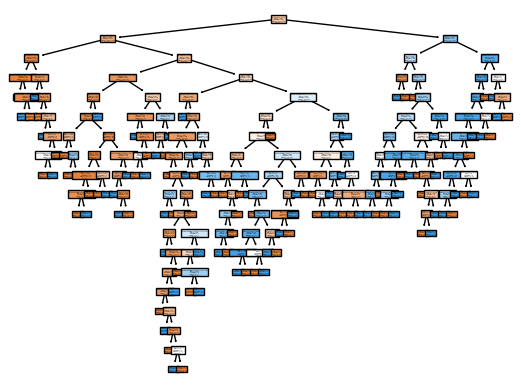

In [43]:
tree.plot_tree(dt,feature_names=df.columns,class_names=['0','1'],filled=True)

## RANDOM FOREST ALGORITHM

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
df=pd.read_csv(r"C:\Users\raviv\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
X=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [47]:
print(X_train.shape)

(614, 8)


In [23]:
print(X_test.shape)

(154, 8)


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
rf.score(X_train,y_train)

0.998371335504886

In [49]:
rf.score(X_test,y_test)

0.7532467532467533

In [27]:
y_pred=rf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

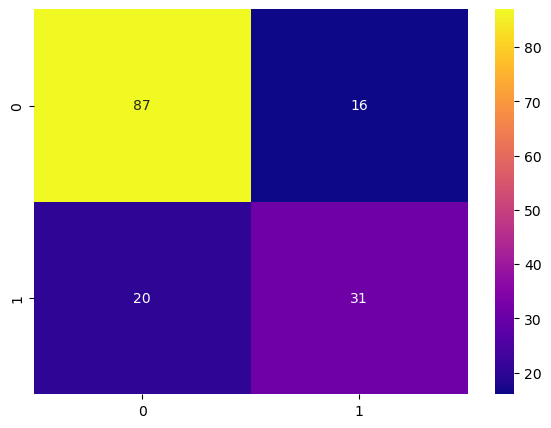

In [175]:
plt.figure(figsize=(7,5))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap= 'plasma')